# 一、简单引入

## 1 简单例子：用k-近邻算法分类一个电影是爱情片还是动作片。

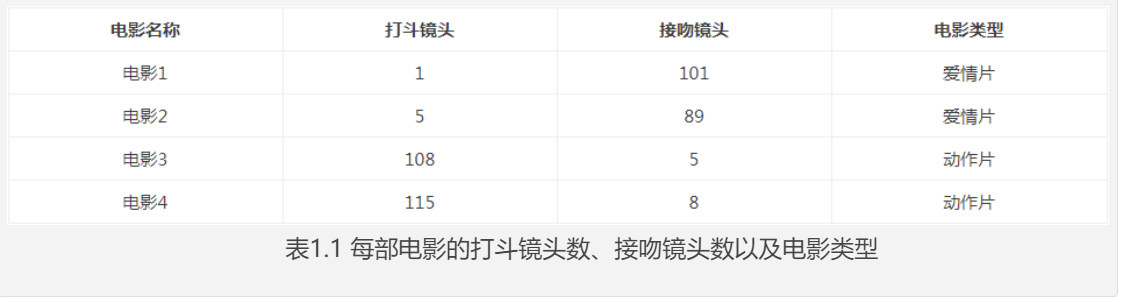

k-近邻算法步骤如下：

    1、计算已知类别数据集中的点与当前点之间的距离；
    2、按照距离递增次序排序；
    3、选取与当前点距离最小的k个点；
    4、确定前k个点所在类别的出现频率；
    5、返回前k个点所出现频率最高的类别作为当前点的预测分类。

### 1.1 准备数据集

In [ ]:
import numpy as np
import operator

In [ ]:
def createDataset():
    """
    函数说明:创建数据集
    Parameters:
        无
    Returns:
        group - 数据集
        labels - 分类标签
    """
    # 四组二维特征
    group = np.array([[1,101],[5,89],[108,5],[115,8]])
    # 四组二维特征的标签
    labels = ['爱情片','爱情片','动作片','动作片']
    return group, labels

In [ ]:
if __name__ == '__main__':
    # 创建数据集
    group, labels = createDataset()
    # 打印数据集
    print(group)
    print(labels)

### 1.2 k-近邻算法

根据两点距离公式，计算距离，选择距离最小的前k个点，并返回分类结果。

In [ ]:
def classify0(inX, dataSet, labels, k):
    # numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    # 为了比较测试点和其他点的距离，将测试点在列方向上展开,和其他点一一对应相减
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    # 二维特征相减后平方
    sqdiffMat = diffMat ** 2
    # 距离的公式：欧氏距离：[(x1-y1)**2+(x2-y2)**2]**0.5
    sqDistances = sqdiffMat.sum(axis=1)
    distance = sqDistances**0.5
    # 返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distance.argsort()
    # 定一个计算类别次数的字典
    classCount = {}
    for i in range(k):
        # 取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        # dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    # reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=lambda x:x[1],reverse=True)
    return sortedClassCount[0][0]

In [ ]:
if __name__ == '__main__':
    # 创建数据集
    group, labels = createDataset()
    # 打印数据集
    print(group)
    print(labels)
    # 测试集
    test = [101,20]
    # kNN分类
    test_class = classify0(test, group, labels, 3)
    print(test_class)

# 二、k-近邻算法实战之约会网站配对效果判定

k-近邻算法的一般流程：

    1、收集数据：可以使用爬虫进行数据的收集，也可以使用第三方提供的免费或收费的数据。一般来讲，数据放在txt文本文件中，按照一定的格式进行存储，便于解析及处理。
    2、准备数据：使用Python解析、预处理数据。
    3、分析数据：可以使用很多方法对数据进行分析，例如使用Matplotlib将数据可视化。
    4、测试算法：计算错误率。
    5、使用算法：错误率在可接受范围内，就可以运行k-近邻算法进行分类。

## 实战背景

海伦女士一直使用在线约会网站寻找适合自己的约会对象。尽管约会网站会推荐不同的任选，但她并不是喜欢每一个人。经过一番总结，她发现自己交往过的人可以进行如下分类：

    不喜欢的人
    魅力一般的人
    极具魅力的人
    
海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中，每个样本数据占据一行，总共有1000行。

海伦收集的样本数据主要包含以下3种特征：

    1、每年获得的飞行常客里程数
    2、玩视频游戏所消耗时间百分比
    3、每周消费的冰淇淋公升数

### 2.1 准备数据：数据解析

在将上述特征数据输入到分类器前，必须将待处理的数据的格式改变为分类器可以接收的格式。分类器接收的数据是什么格式的？要将数据分类两部分，即特征矩阵和对应的分类标签向量。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties

In [ ]:
def file2matrix(filename):
    """
    函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力

    Parameters:
        filename - 文件名
    Returns:
        returnMat - 特征矩阵
        classLabelVector - 分类Label向量
    """
    # 打开文件
    with open(filename, 'rt', encoding='utf-8') as fr:
        # 读取文件所有行
        arrayOLines = fr.readlines()
        # 获取文件行数
        numberOflines = len(arrayOLines)
        # 返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
        returnMat = np.zeros((numberOflines, 3))
        # 返回的分类标签向量
        classLabelVector = []
        # 行的索引值
        index = 0
        for line in arrayOLines:
            # s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
            line = line.strip()
            # 使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
            listFromLine = line.split('\t')
            # 将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
            returnMat[index, : ] = listFromLine[0:3]
            # #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
            classTypeDict = {'didntLike':1,'smallDoses':2,'largeDoses':3}
            classKey = list(set(listFromLine[-1:]) & set(classTypeDict.keys()))[0]
            classLabelVector.append(classTypeDict.get(classKey))
            index += 1
        return returnMat, classLabelVector

### 2.2 分析数据：数据可视化

In [ ]:
def showdatas(datingDataMat, datingLabels):
    """
    函数说明:可视化数据

    Parameters:
        datingDataMat - 特征矩阵
        datingLabels - 分类Label
    Returns:
        无
    Modify:
        2017-03-24
    """    
    # 设置汉字字体
    # font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    plt.rcParams['font.sans-serif']= ['Heiti TC']  
    fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(13,8))
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    # 画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors, s=15, alpha=0.5)
    # 设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比')
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数')
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占比')
    plt.setp(axs0_title_text, size=9, weight='bold', color='red')
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')

    # 画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors, s=15, alpha=0.5)
    # 设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激凌公升数')
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数')
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激凌公升数')
    plt.setp(axs1_title_text, size=9, weight='bold', color='red')
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    # 画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors, s=15, alpha=0.5)
    # 设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激凌公升数')
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比')
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激凌公升数')
    plt.setp(axs2_title_text, size=9, weight='bold', color='red')
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')

    # 设置图例
    didntLike = mlines.Line2D([],[],color='black',marker='.',markersize=6,label='didntLike')
    smallDoses = mlines.Line2D([],[],color='orange',marker='.',markersize=6,label='smallDoses')
    largeDoses = mlines.Line2D([],[],color='red',marker='.',markersize=6,label='largeDoses')
    # 添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    # 显示图片
    plt.show()

In [ ]:
if __name__ == '__main__':
    # 打开的文件名
    filename = "./0_file/datingTestSet.txt"
    # 打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
#     print(datingDataMat)
#     print(datingLabels)
    showdatas(datingDataMat, datingLabels)

通过数据可以很直观的发现数据的规律，比如以玩游戏所消耗时间占比与每年获得的飞行常客里程数，只考虑这二维的特征信息，给我的感觉就是海伦喜欢有生活质量的男人。为什么这么说呢？每年获得的飞行常客里程数表明，海伦喜欢能享受飞行常客奖励计划的男人，但是不能经常坐飞机，疲于奔波，满世界飞。同时，这个男人也要玩视频游戏，并且占一定时间比例。能到处飞，又能经常玩游戏的男人是什么样的男人？很显然，有生活质量，并且生活悠闲的人。

### 2.3 准备数据：数据归一化

表2.1给出了四组样本，如果想要计算样本3和样本4之间的距离，可以使用欧式距离公式计算。

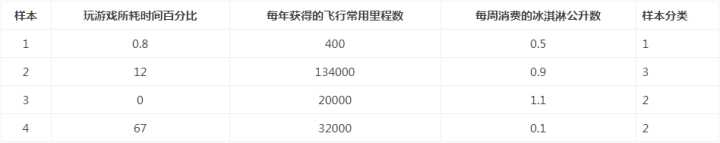

$$
s = \sqrt {(0-67)^2+(20000-32000)^2+(1.1-0.1)^2}
$$

我们很容易发现，上面方程中数字差值最大的属性对计算结果的影响最大，也就是说，每年获取的飞行常客里程数对于计算结果的影响将远远大于表2.1中其他两个特征-玩视频游戏所耗时间占比和每周消费冰淇淋公斤数的影响。而产生这种现象的唯一原因，仅仅是因为飞行常客里程数远大于其他特征值。但海伦认为这三种特征是同等重要的，因此作为三个等权重的特征之一，飞行常客里程数并不应该如此严重地影响到计算结果。

在处理这种不同取值范围的特征值时，我们通常采用的方法是将数值归一化，如将取值范围处理为０到１或者-１到１之间。下面的公式可以将任意取值范围的特征值转化为０到１区间内的值：

$$
newValue = \frac {oldValue - min}{max - min}
$$

其中min和max分别是数据集中的最小特征值和最大特征值。虽然改变数值取值范围增加了分类器的复杂度，但为了得到准确结果，我们必须这样做。

In [ ]:
def autoNorm(dataSet):
    """
    函数说明:对数据进行归一化

    Parameters:
        dataSet - 特征矩阵
    Returns:
        normDataSet - 归一化后的特征矩阵
        ranges - 数据范围
        minVals - 数据最小值
    """
    # min(0)表示求列方向的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 最大值和最小值的范围
    ranges = maxVals - minVals
    # 返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    # 返回dataSet的行数
    m = dataSet.shape[0]
    # 原始值减去最小值
    normDataSet = dataSet - np.tile(minVals, (m,1))
    # 除以最大和最小值的差，得到归一化数据
    normDataSet = normDataSet / np.tile(ranges, (m,1))
    #返回归一化数据结果,数据范围,最小值
    return normDataSet, ranges, minVals

In [ ]:
if __name__ == '__main__':
    # 打开的文件名
    filename = "./0_file/datingTestSet.txt"
    # 打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    normDataSet, ranges, minVals = autoNorm(datingDataMat)
    print(normDataSet)
    print(ranges)
    print(minVals)

我们已经顺利将数据归一化了，并且求出了数据的取值范围和数据的最小值，这两个值是在分类的时候需要用到的，直接先求解出来，也算是对数据预处理了。



### 2.4 测试算法：验证分类器

机器学习算法一个很重要的工作就是评估算法的正确率，通常我们只提供已有数据的90%作为训练样本来训练分类器，而使用其余的10%数据去测试分类器，检测分类器的正确率。需要注意的是，10%的测试数据应该是随机选择的，由于海伦提供的数据并没有按照特定目的来排序，所以我们可以随意选择10%数据而不影响其随机性。

In [81]:
def datingClassTest():
    """
    函数说明:分类器测试函数

    Parameters:
        无
    Returns:
        normDataSet - 归一化后的特征矩阵
        ranges - 数据范围
        minVals - 数据最小值

    Modify:
        2017-03-24
    """
    # 打开的文件名
    filename = "./0_file/datingTestSet.txt"
    # 打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    # 取所有数据的百分之十
    hoRatio = 0.10
    # 数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # 获得normMat的行数
    m = normMat.shape[0]
    # 百分之十的测试数据的行数
    numTestVecs = int(m * hoRatio)
    # 分类错误计数
    errorCount = 0.0
    
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:]
                            , datingLabels[numTestVecs:m], 4)
        print("分类结果:{}, 真实类别:{}" .format(classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("错误率：%f%%" % (errorCount/float(numTestVecs)*100))

In [82]:
if __name__ == '__main__':
    datingClassTest()

分类结果:3, 真实类别:3
分类结果:2, 真实类别:2
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:3, 真实类别:3
分类结果:3, 真实类别:3
分类结果:1, 真实类别:1
分类结果:3, 真实类别:3
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:2, 真实类别:2
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:2, 真实类别:2
分类结果:3, 真实类别:3
分类结果:2, 真实类别:2
分类结果:1, 真实类别:1
分类结果:2, 真实类别:2
分类结果:3, 真实类别:3
分类结果:2, 真实类别:2
分类结果:3, 真实类别:3
分类结果:2, 真实类别:2
分类结果:3, 真实类别:3
分类结果:2, 真实类别:2
分类结果:1, 真实类别:1
分类结果:3, 真实类别:3
分类结果:1, 真实类别:1
分类结果:3, 真实类别:3
分类结果:1, 真实类别:1
分类结果:2, 真实类别:2
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:2, 真实类别:2
分类结果:3, 真实类别:3
分类结果:3, 真实类别:3
分类结果:1, 真实类别:1
分类结果:2, 真实类别:2
分类结果:3, 真实类别:3
分类结果:3, 真实类别:3
分类结果:3, 真实类别:3
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:1, 真实类别:1
分类结果:2, 真实类别:2
分类结果:2, 真实类别:2
分类结果:1, 真实类别:1
分类结果:3, 真实类别:3
分类结果:2, 真实类别:2
分类结果:2, 真实类别:2
分类结果:2, 真实类别:2
分类结果:2, 真实类别:2
分类结果:3, 真实类别:3
分类结果:1, 真实类别:1
分类结果:2, 真实类别:2
分类结果:1, 真实类别:1
分类结果:2, 真实类别:2
分类结果:2, 真实类别:2
分类结果:2, 真实类别:2
分类结果:2, 真实类别:2
分类结果:2, 真实类别:2
分类结果:3, 真实

从验证分类器结果中可以看出，错误率是4%，这是一个想当不错的结果。我们可以改变函数datingClassTest内变量hoRatio和分类器k的值，检测错误率是否随着变量值的变化而增加。依赖于分类算法、数据集和程序设置，分类器的输出结果可能有很大的不同。

### 2.5 使用算法：构建完整可用系统

我们可以给海伦一个小段程序，通过该程序海伦会在约会网站上找到某个人并输入他的信息。程序会给出她对男方喜欢程度的预测值。

In [93]:
def classifyPerson():
    """
    函数说明:通过输入一个人的三维特征,进行分类输出

    Parameters:
        无
    Returns:
        无
    """
    # 输出结果
    resultList = ['讨厌', '有些喜欢', '非常喜欢']
    # 三维特征用户输入
    precentTats = float(input("玩视频游戏所消耗时间百分比："))
    ffMiles = float(input("每年获得的飞行常客公里数："))
    iceCream = float(input("每周消费的冰激凌公升数："))
    # 打开的文件名
    filename = "./0_file/datingTestSet.txt"
    # 打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    # 训练集归一化
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # 生成numpy数组，测试集
    inArr = np.array([ffMiles, precentTats, iceCream])
    # 测试集归一化
    norminArr = (inArr - minVals) / ranges
    # 返回分类结果
    classifierResult = classify0(norminArr, normMat, datingLabels, 4)
    print(classifierResult)
    #打印结果
    print("你可能%s这个人" % (resultList[classifierResult-1]))

In [94]:
if __name__ == '__main__':
    classifyPerson()

玩视频游戏所消耗时间百分比：12
每年获得的飞行常客公里数：44000
每周消费的冰激凌公升数：0.5
3
你可能非常喜欢这个人
